In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### Biểu đồ LINE 
### Line plot – Hiển thị xu hướng MPG trung bình theo năm
### Mục tiêu:

+ Vẽ đồ thị tuyến tính biểu diễn giá trị MPG trung bình theo từng năm (model_year)

+ Mỗi đường là một khu vực sản xuất (origin)

+ Yêu cầu sử dụng: color, linestyle, marker, linewidth, label, plt.legend()

In [43]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [57]:
df['origin_num'] = df['origin'].map({
    'usa' : 0,
    'japan': 1,
    'europe' : 2})
d = df.groupby(['model_year'])['origin_num'].mean()
d

model_year
70    0.413793
71    0.428571
72    0.535714
73    0.450000
74    0.666667
75    0.533333
76    0.588235
77    0.500000
78    0.555556
79    0.344828
80    1.068966
81    0.689655
82    0.419355
Name: origin_num, dtype: float64

In [69]:
data = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
data

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


<Figure size 1000x600 with 0 Axes>

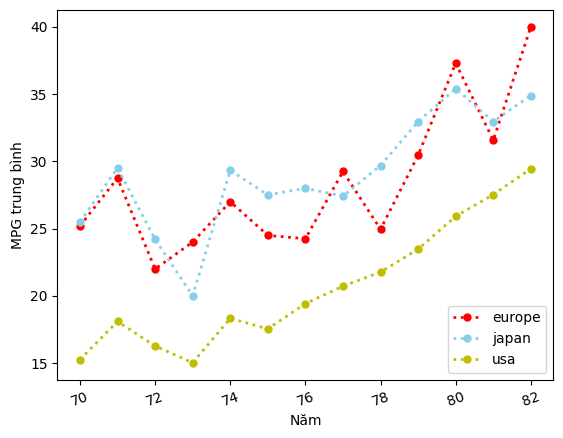

In [130]:
plt.figure(figsize=(10,6))
plt.plot
data.plot(  marker='.',  linewidth=2, markersize=10 , color = ['red', 'skyblue', 'y'], linestyle = ':'  )
plt.xlabel("Năm")
plt.ylabel("MPG trung bình", loc = 'center')
plt.xticks( rotation=20)
plt.legend(loc = 4)
plt.show()

#### Biểu đồ AREA 
### Area plot – Số lượng xe mỗi năm theo xuất xứ
### Mục tiêu:
+ Câu hỏi: Xu hướng số lượng xe đến từ từng khu vực (origin) thay đổi như thế nào theo năm?

+ Dùng df.groupby(['model_year', 'origin']).size().unstack().plot.area(...)


In [144]:
data_2 = df.groupby(['model_year', 'origin']).size().unstack()
# plt.stackplot(
#     x,
#     *args,
#     labels=(),
#     colors=None,
#     hatch=None,
#     baseline='zero',
#     data=None,
#     **kwargs,
# )
plt.figure(figsize=(10,6))

data_2.stackplot(alpha = 0.6)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'stackplot'

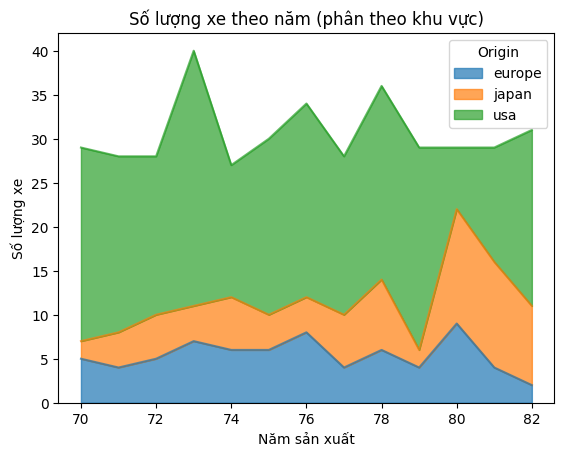

In [148]:
counts = df.groupby(['model_year', 'origin']).size().unstack()
counts.plot.area(alpha=0.7)
plt.title("Số lượng xe theo năm (phân theo khu vực)")
plt.xlabel("Năm sản xuất")
plt.ylabel("Số lượng xe")
plt.legend(title='Origin')
plt.show()